# Predicting Data Scientist Salaries:
# An Analysis of Key Factors


The objective of this project is clear: data science specialists are in high demand, and companies are willing to spend a large amount of money on an exceptional individual (Luna, 2024).

However, the process of coming up with an optimal salary range can be challenging because of a number of factors such as industry standards, company size, location, requirement, experience level, and much more.

It is believed by many people within the industry that a well-changed model such as a predictive AI that can take in these variables and inform companies about the cost within a very competitive industry and make rightful decisions.

## Data Collection and Cleaning

In [2]:
import pandas as pd

# Load the dataset to explore its structure and content
file_path = 'data/Assignment 2.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = {
    "head": data.head(),
    "info": data.info(),
    "description": data.describe(),  # Statistical summary of numerical columns
    "missing_values": data.isnull().sum(),  # Missing values in each column
    "shape": data.shape  # Number of rows and columns
}
data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           1500 non-null   int64  
 1   experience_level    1500 non-null   object 
 2   employment_type     1500 non-null   object 
 3   job_title           1500 non-null   object 
 4   salary              1494 non-null   float64
 5   salary_currency     1500 non-null   object 
 6   salary_in_usd       1494 non-null   float64
 7   employee_residence  1500 non-null   object 
 8   remote_ratio        1500 non-null   int64  
 9   company_location    1500 non-null   object 
 10  company_size        1500 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 129.0+ KB


{'head':    work_year experience_level employment_type                 job_title  \
 0       2023               SE              FT  Principal Data Scientist   
 1       2023               MI              CT               ML Engineer   
 2       2023               MI              CT               ML Engineer   
 3       2023               SE              FT            Data Scientist   
 4       2023               SE              FT            Data Scientist   
 
      salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
 0   80000.0             EUR        85847.0                 ES           100   
 1   30000.0             USD        30000.0                 US           100   
 2   25500.0             USD        25500.0                 US           100   
 3  175000.0             USD       175000.0                 CA           100   
 4  120000.0             USD       120000.0                 CA           100   
 
   company_location company_size  
 0               

In [3]:
# Drop irrelevant columns: 'salary' and 'salary_currency'
data_cleaned = data.drop(columns=['salary', 'salary_currency'])

# Drop rows with any missing values
data_cleaned = data_cleaned.dropna()

# Identify outliers in 'salary_in_usd' using the Interquartile Range (IQR)
Q1 = data_cleaned['salary_in_usd'].quantile(0.25)
Q3 = data_cleaned['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Define the range for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with 'salary_in_usd' outside this range
data_cleaned = data_cleaned[
    (data_cleaned['salary_in_usd'] >= lower_bound) &
    (data_cleaned['salary_in_usd'] <= upper_bound)
    ]

# Display the cleaned dataset structure
data_cleaned.info()

# Show the first few rows of the cleaned data
data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1480 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           1480 non-null   int64  
 1   experience_level    1480 non-null   object 
 2   employment_type     1480 non-null   object 
 3   job_title           1480 non-null   object 
 4   salary_in_usd       1480 non-null   float64
 5   employee_residence  1480 non-null   object 
 6   remote_ratio        1480 non-null   int64  
 7   company_location    1480 non-null   object 
 8   company_size        1480 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 115.6+ KB


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847.0,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000.0,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,US,100,US,S
3,2023,SE,FT,Data Scientist,175000.0,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,CA,100,CA,M


## Exploratory Data Analysis

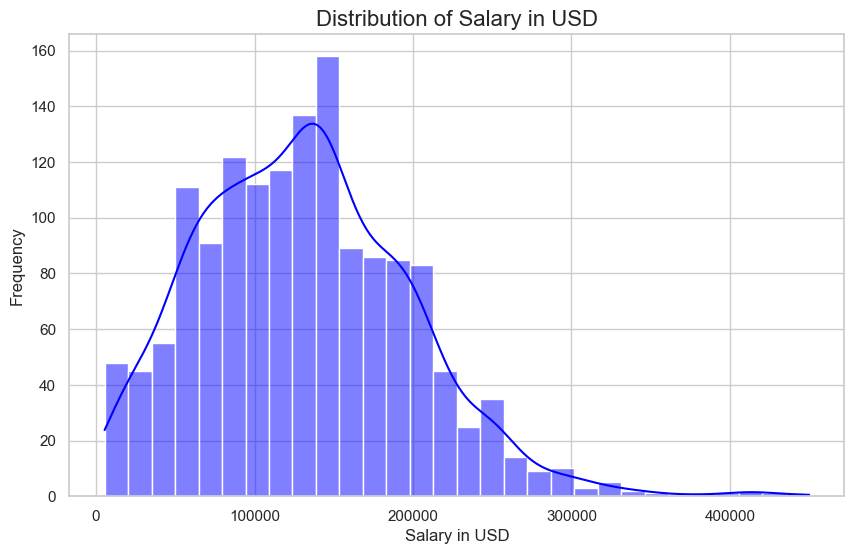

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Salary in USD', fontsize=16)
plt.xlabel('Salary in USD', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


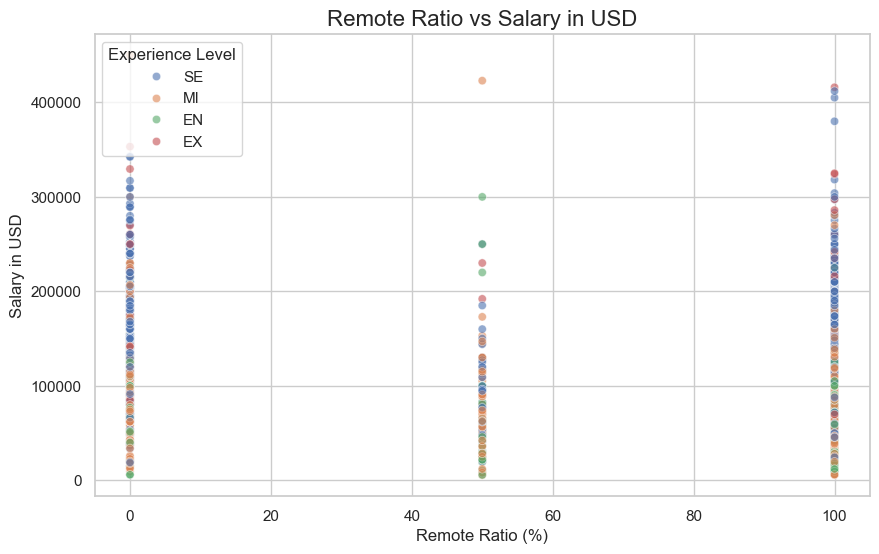

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='remote_ratio', y='salary_in_usd', data=data, alpha=0.6, hue='experience_level')
plt.title('Remote Ratio vs Salary in USD', fontsize=16)
plt.xlabel('Remote Ratio (%)', fontsize=12)
plt.ylabel('Salary in USD', fontsize=12)
plt.legend(title='Experience Level', loc='upper left')
plt.show()


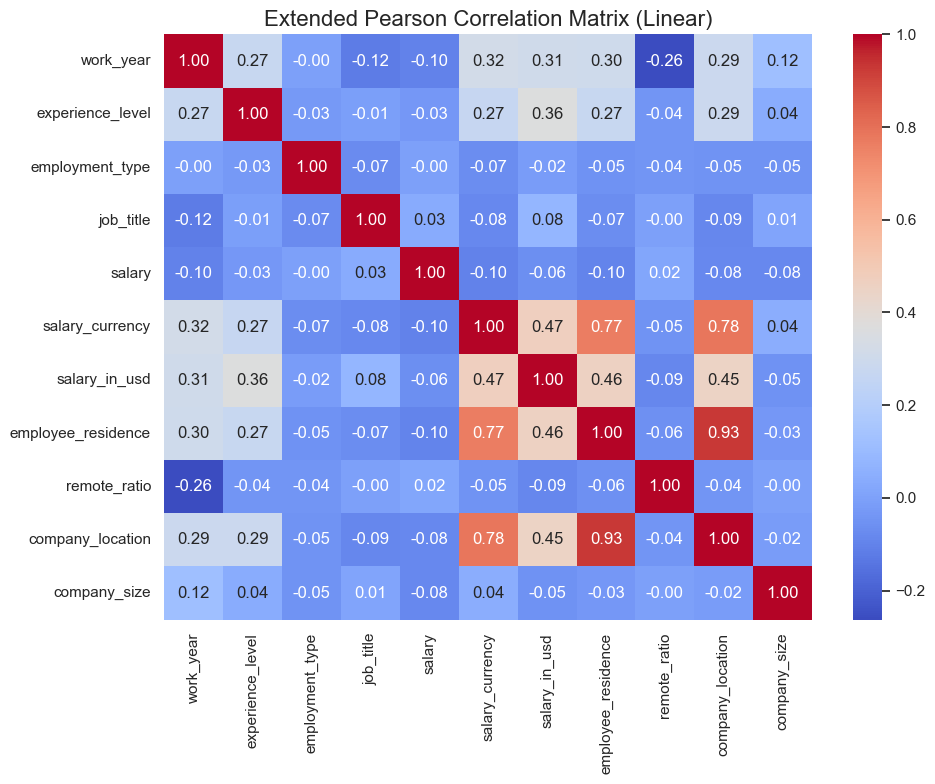

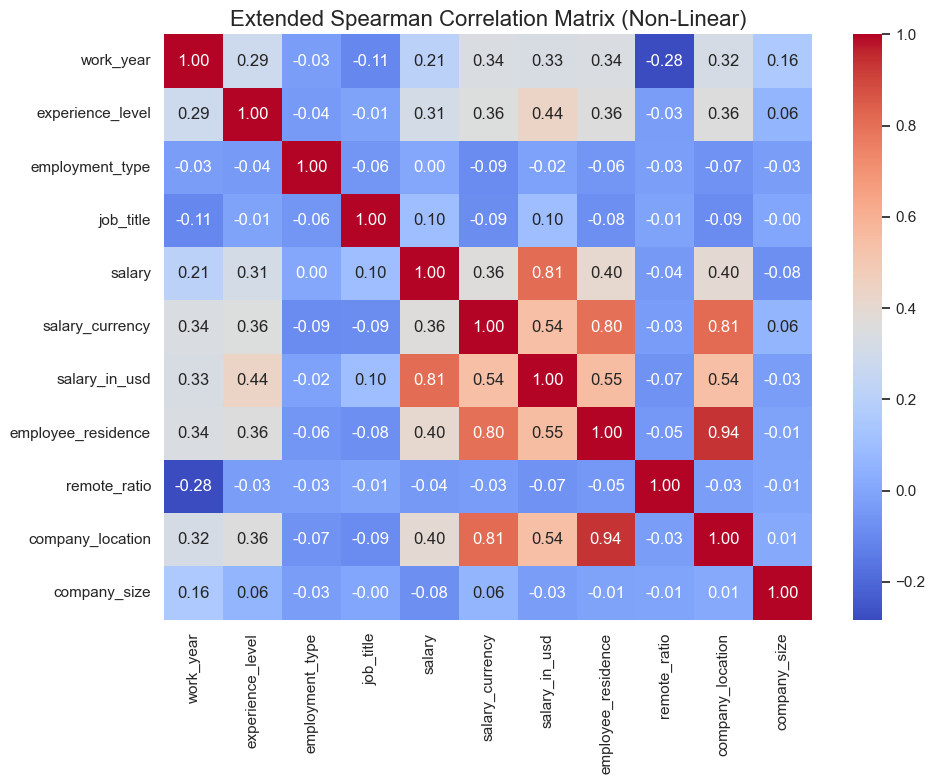

In [6]:

categorical_columns = data.select_dtypes(include=['object']).columns

encoded_data = data.copy()

for col in categorical_columns:
    encoded_data[col] = encoded_data[col].astype('category').cat.codes

numeric_data_extended = encoded_data.select_dtypes(include=['number'])

pearson_corr_matrix_extended = numeric_data_extended.corr(method='pearson')

spearman_corr_matrix_extended = numeric_data_extended.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr_matrix_extended, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Extended Pearson Correlation Matrix (Linear)', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix_extended, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Extended Spearman Correlation Matrix (Non-Linear)', fontsize=16)
plt.tight_layout()
plt.show()


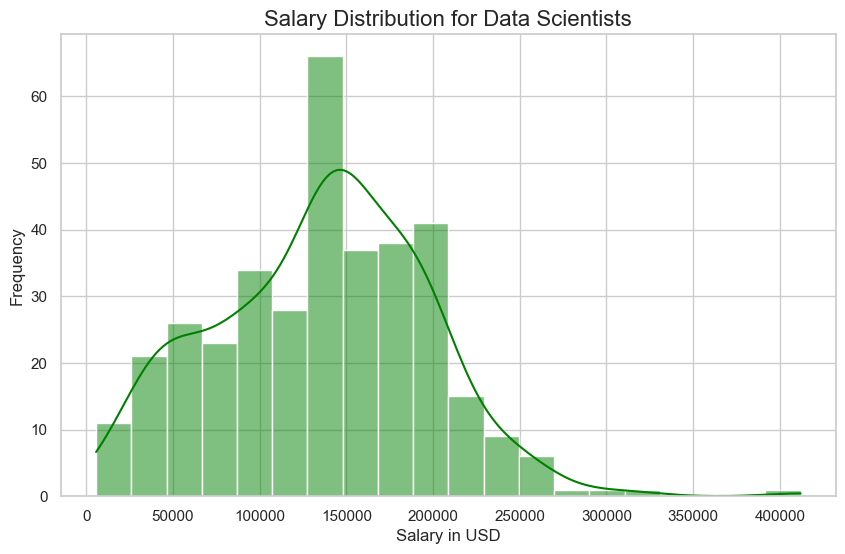

{'shape': (360, 11),
 'missing_values': work_year             0
 experience_level      0
 employment_type       0
 job_title             0
 salary                1
 salary_currency       0
 salary_in_usd         1
 employee_residence    0
 remote_ratio          0
 company_location      0
 company_size          0
 dtype: int64,
 'experience_level_distribution': experience_level
 SE    242
 MI     81
 EN     33
 EX      4
 Name: count, dtype: int64,
 'company_size_distribution': company_size
 M    268
 L     69
 S     23
 Name: count, dtype: int64,
 'remote_ratio_distribution': remote_ratio
 100    191
 0      137
 50      32
 Name: count, dtype: int64}

In [7]:
data_scientists = data[data['job_title'] == 'Data Scientist']

ds_summary = {
    "shape": data_scientists.shape,
    "missing_values": data_scientists.isnull().sum(),
    "experience_level_distribution": data_scientists['experience_level'].value_counts(),
    "company_size_distribution": data_scientists['company_size'].value_counts(),
    "remote_ratio_distribution": data_scientists['remote_ratio'].value_counts(),
}

plt.figure(figsize=(10, 6))
sns.histplot(data_scientists['salary_in_usd'].dropna(), bins=20, kde=True, color='green')
plt.title('Salary Distribution for Data Scientists', fontsize=16)
plt.xlabel('Salary in USD', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

ds_summary


/var/folders/7x/wrtt0f4x3kj82kflvd1gn4ww0000gn/T/ipykernel_33556/1418231515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='company_size', y='salary_in_usd', palette='Set2')


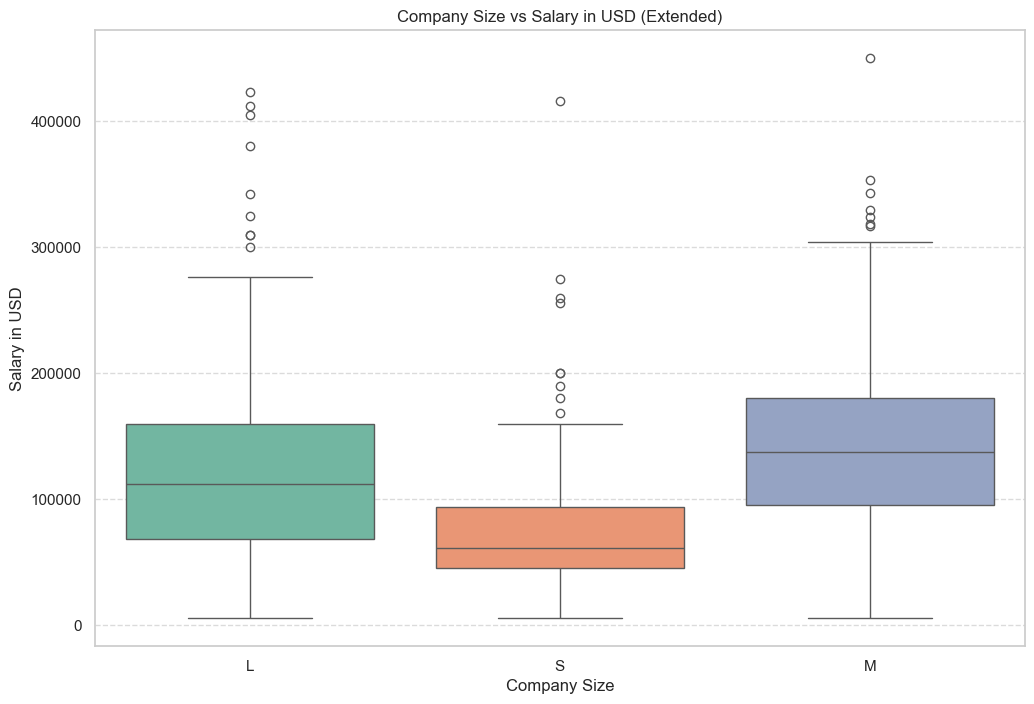

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='company_size', y='salary_in_usd', palette='Set2')

plt.title('Company Size vs Salary in USD (Extended)')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


In [9]:
# Check for missing values in the dataset
missing_data = data.isnull().sum()

# Remove rows with missing data if any
cleaned_data = data.dropna()

# Verify the data after removing missing values
cleaned_data.info(), missing_data


<class 'pandas.core.frame.DataFrame'>
Index: 1494 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           1494 non-null   int64  
 1   experience_level    1494 non-null   object 
 2   employment_type     1494 non-null   object 
 3   job_title           1494 non-null   object 
 4   salary              1494 non-null   float64
 5   salary_currency     1494 non-null   object 
 6   salary_in_usd       1494 non-null   float64
 7   employee_residence  1494 non-null   object 
 8   remote_ratio        1494 non-null   int64  
 9   company_location    1494 non-null   object 
 10  company_size        1494 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 140.1+ KB


(None,
 work_year             0
 experience_level      0
 employment_type       0
 job_title             0
 salary                6
 salary_currency       0
 salary_in_usd         6
 employee_residence    0
 remote_ratio          0
 company_location      0
 company_size          0
 dtype: int64)

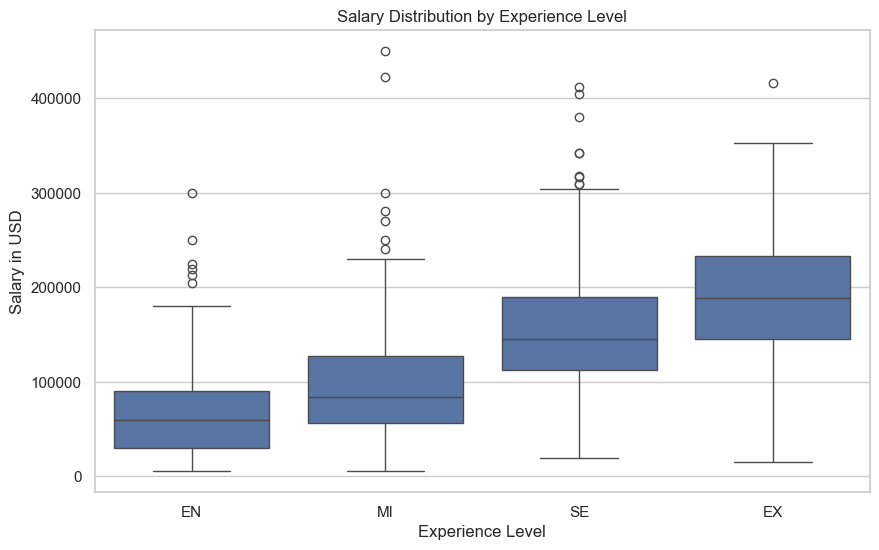

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='experience_level', y='salary_in_usd', order=['EN', 'MI', 'SE', 'EX'])
plt.title("Salary Distribution by Experience Level")
plt.ylabel("Salary in USD")
plt.xlabel("Experience Level")
plt.show()

## Model Development and Evaluation

In [11]:
import pandas as pd

# Load the dataset
file_path = 'data/Assignment 2.csv'
dataset = pd.read_csv(file_path)

# Filter the dataset to include only rows where the job title contains 'Data Scientist'
data_scientist_data = dataset[dataset['job_title'].str.contains('Data Scientist', case=False, na=False)]

# Save the filtered dataset to a new file (optional)
filtered_file_path = 'data/data_scientist_data.csv'
data_scientist_data.to_csv(filtered_file_path, index=True)

# Display the filtered dataset
print(data_scientist_data)

      work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
7          2023               SE              FT            Data Scientist   
8          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
1487       2020               MI              FT            Data Scientist   
1491       2021               MI              FT            Data Scientist   
1495       2020               SE              FT            Data Scientist   
1496       2021               MI              FT  Principal Data Scientist   
1497       2020               EN              FT            Data Scientist   

        salary salary_currency  salary_in_usd employee_residenc

In [12]:
import pandas as pd

# load the dataset
file_path = 'data/Assignment 2.csv'
data = pd.read_csv(file_path)

# filter data scientist
data_scientist_data = data[data['job_title'] == 'Data Scientist']

# interpolation
data_scientist_data_interpolated = data_scientist_data.interpolate(
    method='linear',
    axis=0,
    limit_direction='forward',
    inplace=False
)

# save new data to a new file
output_path = 'data/Data_Scientist_Filtered_Interpolated.csv'
data_scientist_data_interpolated.to_csv(output_path, index=False)

print(f"Filtered and interpolated data saved to: {output_path}")


Filtered and interpolated data saved to: data/Data_Scientist_Filtered_Interpolated.csv


/var/folders/7x/wrtt0f4x3kj82kflvd1gn4ww0000gn/T/ipykernel_33556/745246970.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_scientist_data_interpolated = data_scientist_data.interpolate(


### Model Development
This is the 5th try for the model, all previous model output provide a low R^2 and low accuracy. This time, we will use a Random Forest Regressor model to predict the salary of Data Scientists based on various features in the dataset.

### Model 1: Gradient Boosting Regressor

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor

# load the dataset
file_path = 'data/Data_Scientist_Filtered_Interpolated.csv'
data = pd.read_csv(file_path)

#prep data
X = data.drop(columns=['salary_in_usd', 'salary', 'salary_currency'])
y = data['salary_in_usd']

# remove outlier
upper, lower = np.percentile(y, 99), np.percentile(y, 0)
mask = (y >= lower) & (y <= upper)
X, y = X[mask], y[mask]

# catergorize feature
categorical_features = ['company_size', 'employment_type', 'experience_level', 'job_title', 'remote_ratio', 'company_location', 'work_year', 'employee_residence']
numeric_features = [col for col in X.columns if col not in categorical_features]

# preprocessing
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False))
]), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

# define model stacking
base_models = [
    ('ridge', Ridge(alpha=0.1)),
    ('gb', GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=5))
]

stack_model = StackingRegressor(estimators=base_models, final_estimator=Ridge(alpha=10.0))

# pipline
pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', stack_model)
])

# split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train model
pipeline.fit(X_train, y_train)

# predictions
y_pred_raw = pipeline.predict(X_test)
y_pred = np.clip(y_pred_raw, 0, 400000)

# model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# log
print("=== MODEL PERFORMANCE ===")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")

=== MODEL PERFORMANCE ===
MSE:  1598581029.6050
RMSE: 39982.2589
MAE:  31194.3808
R²:   0.5413


In [14]:

# hyperparameter tuning
param_grid = {
    'model__final_estimator__alpha': [0.1, 1.0, 10.0, 100.0],
    'model__gb__learning_rate': [0.001, 0.01, 0.05, 0.1],
    'model__gb__max_depth': [3, 5, 7, 9],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# final parameters
print("=== BEST PARAMETERS ===")
print(grid_search.best_params_)
final_model = grid_search.best_estimator_
y_final_pred = final_model.predict(X_test)

y_final_pred_clipped = np.clip(y_final_pred, 0, 400000)

# calculate the metrics with clipped predictions
final_mse_clipped = mean_squared_error(y_test, y_final_pred_clipped)
final_rmse_clipped = np.sqrt(final_mse_clipped)
final_r2_clipped = r2_score(y_test, y_final_pred_clipped)
final_mae_clipped = mean_absolute_error(y_test, y_final_pred_clipped)

# Log
print("=== FINAL MODEL PERFORMANCE (Clipped Predictions) ===")
print(f"MSE:  {final_mse_clipped:.4f}")
print(f"RMSE: {final_rmse_clipped:.4f}")
print(f"MAE:  {final_mae_clipped:.4f}")
print(f"R²:   {final_r2_clipped:.4f}")

#export model
import joblib

model_output_path = 'models/salary_prediction_model.pkl'
joblib.dump(final_model, model_output_path)


=== BEST PARAMETERS ===
{'model__final_estimator__alpha': 10.0, 'model__gb__learning_rate': 0.01, 'model__gb__max_depth': 3}
=== FINAL MODEL PERFORMANCE (Clipped Predictions) ===
MSE:  1544864664.9050
RMSE: 39304.7664
MAE:  30917.3767
R²:   0.5567


['models/salary_prediction_model.pkl']

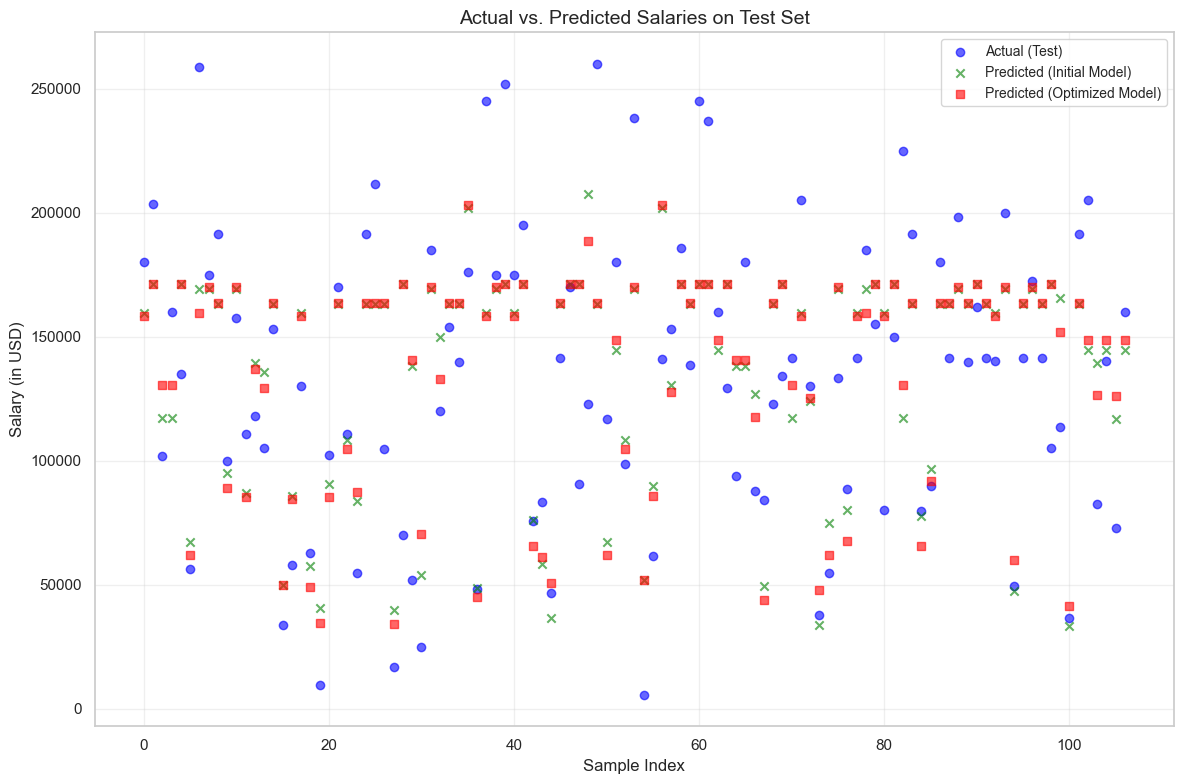

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.scatter(range(len(y_test)), y_test, color='blue', marker='o', alpha=0.6, label='Actual (Test)')
plt.scatter(range(len(y_pred)), y_pred, color='green', marker='x', alpha=0.6, label='Predicted (Initial Model)')

plt.scatter(range(len(y_final_pred)), y_final_pred, color='red', marker='s', alpha=0.6, label='Predicted (Optimized Model)')

plt.grid(alpha=0.3)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Salary (in USD)', fontsize=12)
plt.title('Actual vs. Predicted Salaries on Test Set', fontsize=14)
plt.legend(fontsize=10)
plt.tight_layout()

plt.show()

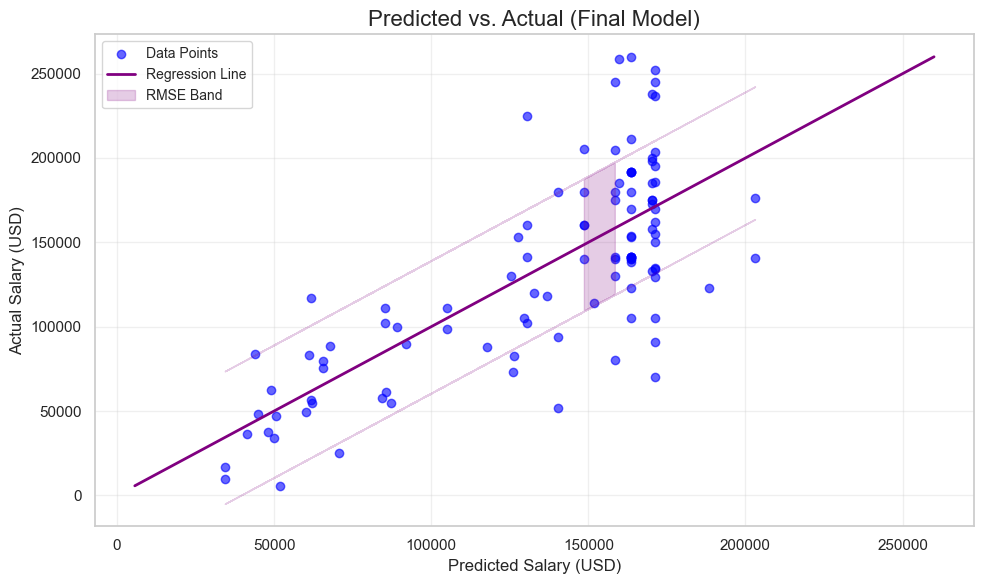

In [16]:
import matplotlib.pyplot as plt
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_final_pred_clipped))
upper_bound = y_final_pred_clipped + rmse
lower_bound = y_final_pred_clipped - rmse

plt.figure(figsize=(10, 6))

plt.scatter(y_final_pred_clipped, y_test, color='blue', alpha=0.6, label='Data Points')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='purple', linestyle='-', linewidth=2, label='Regression Line')

plt.fill_between(y_final_pred_clipped, lower_bound, upper_bound,
                 color='purple', alpha=0.2, label='RMSE Band')

plt.title('Predicted vs. Actual (Final Model)', fontsize=16)
plt.xlabel('Predicted Salary (USD)', fontsize=12)
plt.ylabel('Actual Salary (USD)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

### Model Evaluation/ Prediction

In [17]:
from joblib import load
import pandas as pd
# load the model
model_path = "models/salary_prediction_model.pkl"
model = load(model_path)

# test the model
# load the dataset
file_path = 'data/Sample_Data_for_Prediction_Testing.csv'
data = pd.read_csv(file_path)
prediction = model.predict(data)

for i in range(len(data)):
    print(f"Actual Salary: {data['salary_in_usd'][i]}, Predicted Salary: {prediction[i]}")

print(f"Model loaded successfully from: {model_path}")

Actual Salary: 200000, Predicted Salary: 123300.1302469859
Actual Salary: 95000, Predicted Salary: 98150.77322096292
Actual Salary: 120000, Predicted Salary: 70423.20816049118
Actual Salary: 160000, Predicted Salary: 138226.9678395481
Actual Salary: 130000, Predicted Salary: 140440.91030035593
Actual Salary: 150000, Predicted Salary: 180301.41326669554
Actual Salary: 180000, Predicted Salary: 151435.08706011725
Actual Salary: 100000, Predicted Salary: 140535.82252912383
Actual Salary: 200000, Predicted Salary: 187319.4085549291
Model loaded successfully from: models/salary_prediction_model.pkl


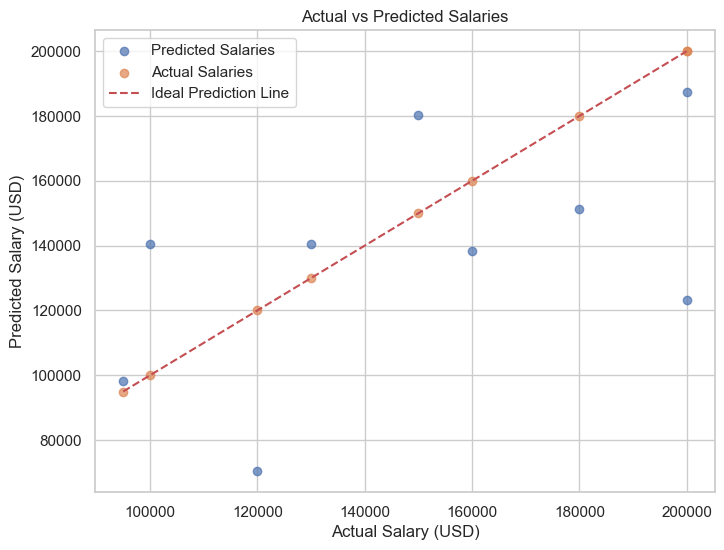

In [18]:
actual_salaries = data['salary_in_usd']

plt.figure(figsize=(8, 6))
plt.scatter(actual_salaries[:len(prediction)], prediction, alpha=0.7, label='Predicted Salaries')
plt.scatter(actual_salaries[:len(prediction)], actual_salaries[:len(prediction)], alpha=0.7, label='Actual Salaries')
plt.plot([min(actual_salaries), max(actual_salaries)], [min(actual_salaries), max(actual_salaries)], 'r--', label='Ideal Prediction Line')

plt.title('Actual vs Predicted Salaries')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.legend()
plt.grid(True)

plt.show()
